## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
def load_csv_data(file_path, index="Timestamp"):
    csv_data = pd.read_csv(Path(file_path),
                       index_col=index,
                       parse_dates=True,
                       infer_datetime_format=True)
    return csv_data

In [3]:
def plot_data(df, column=None, df2=None, start_loc=None, end_loc=None, type="line", title=None, show_legend=False, size=(15, 10), 
              xlabel=None, ylabel=None, color="blue", df2_color="yellow", legend_label=None, df2_legend_label=None):
    if column is not None and df2 is not None and start_loc is not None and end_loc is not None:
        df[column].loc[start_loc : end_loc].plot(kind=type, legend=show_legend, figsize=size, xlabel=xlabel, ylabel=ylabel, title=title, color=color, label=legend_label)
        df2[column].loc[start_loc : end_loc].plot(kind=type, legend=show_legend, figsize=size, xlabel=xlabel, ylabel=ylabel, color=df2_color, label=df2_legend_label)
    elif column is not None and df2 is not None and start_loc is not None:
        df[column].loc[start_loc].plot(kind=type, legend=show_legend, figsize=size, xlabel=xlabel, ylabel=ylabel, title=title, color=color, label=legend_label)
        df2[column].loc[start_loc].plot(kind=type, legend=show_legend, figsize=size, xlabel=xlabel, ylabel=ylabel, color=df2_color, label=df2_legend_label)        
    elif column is not None and df2 is not None:
        df[column].plot(kind=type, legend=show_legend, figsize=size, xlabel=xlabel, ylabel=ylabel, title=title, color=color, label=legend_label)
        df2[column].plot(kind=type, legend=show_legend, figsize=size, xlabel=xlabel, ylabel=ylabel, color=df2_color, label=df2_legend_label)
    elif column is not None:
        df[column].plot(kind=type, legend=show_legend, figsize=size, xlabel=xlabel, ylabel=ylabel, title=title, color=color, label=legend_label)        
    else:
        df.plot(kind=type, legend=show_legend, figsize=size, xlabel=xlabel, ylabel=ylabel, title=title, color=color, label=legend_label)

In [4]:
def calculate_spread(df, df2, column, start_loc=None, end_loc=None):
    if start_loc is not None and end_loc is not None:
        spread_df = df[column].loc[start_loc : end_loc] - df2[column].loc[start_loc : end_loc]        
    elif start_loc is not None:
        spread_df = df[column].loc[start_loc] - df2[column].loc[start_loc]      
    else:        
        spread_df = df[column] - df2[column]
    return spread_df

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [5]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = load_csv_data("./Resources/bitstamp.csv")

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [6]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head(10)

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
2018-01-01 00:05:00,13620.00,13634.15,13610.00,$13610.0,4.716162,64226.303028,13618.341726
2018-01-01 00:06:00,13610.00,13650.18,13590.42,$13600.56,26.432759,360108.155630,13623.555198
2018-01-01 00:07:00,13593.99,13595.41,13566.93,$13580.0,10.674241,144961.611180,13580.507983
2018-01-01 00:08:00,13580.00,13580.00,13547.59,$13579.0,19.322370,261942.833550,13556.454543


In [7]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [8]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = load_csv_data("./Resources/coinbase.csv")

In [9]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head(10)

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
2018-01-01 00:05:00,13583.45,13583.45,13564.29,$13564.35,4.746346,64468.680520,13582.802658
2018-01-01 00:06:00,13583.28,13583.28,13510.59,$13539.0,25.791324,349096.113670,13535.409019
2018-01-01 00:07:00,13539.54,13539.54,13510.00,$13511.02,17.506747,236818.029240,13527.243628
2018-01-01 00:08:00,13511.02,13539.00,13510.00,$13528.52,23.230759,314094.418090,13520.626642


In [10]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [11]:
# show statistics
bitstamp.describe()

,Open,High,Low,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,580.646391,5.483271e+06,17227.810502


In [12]:
# Count the number of null values
bitstamp.isna().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [13]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()

In [14]:
# Count the number of null values after dropping
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [15]:
# show statistics
bitstamp.describe()

,Open,High,Low,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,580.646391,5.483271e+06,17227.810502


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [16]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "", regex=True)

In [17]:
# Confirm $ sign has been removed
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [18]:
# Check column types
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [19]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype('float')

In [20]:
# Confirm "Close" column data type has been changed
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [21]:
# Count the number of duplicates
bitstamp.duplicated().sum()

0

In [22]:
# Review the data for duplicate values, and drop them if necessary
if bitstamp.duplicated().sum() > 0:
    bitstamp = bitstamp.drop_duplicates()


In [23]:
# Confirm the number of duplicates is equal to zero
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [24]:
# Repeat Steps 1–4 for the coinbase DataFrame
# Show statistics
coinbase.describe()

,Open,High,Low,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,959.084903,1.152334e+07,17177.995495


In [25]:
# Count number of null values
coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [26]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
coinbase = coinbase.dropna()

In [27]:
# Count the number of null values after dropping
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [28]:
# Show statistics
coinbase.describe()

,Open,High,Low,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,959.084903,1.152334e+07,17177.995495


In [29]:
# Use the str.replace function to remove the dollar sign, $
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "", regex=True)

In [30]:
# Confirm $ sign has been removed
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [31]:
# Check column data types
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [32]:
# Convert the Close data type to a float
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")

In [33]:
# Confirm "Close" column data type has been changed
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [34]:
# Count the number of duplicates
coinbase.duplicated().sum()

0

In [35]:
# Review the data for duplicate values, and drop them if necessary
if coinbase.duplicated().sum() > 0:
    coinbase = coinbase.drop_duplicates()

In [36]:
# Confirm the number of duplicates is equal to zero
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [37]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:, [3]].copy()

# Review the first five rows of the DataFrame
bitstamp_sliced.head(5)

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [38]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:, [3]].copy()

# Review the first five rows of the DataFrame
coinbase_sliced.head(5)

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [39]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [40]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


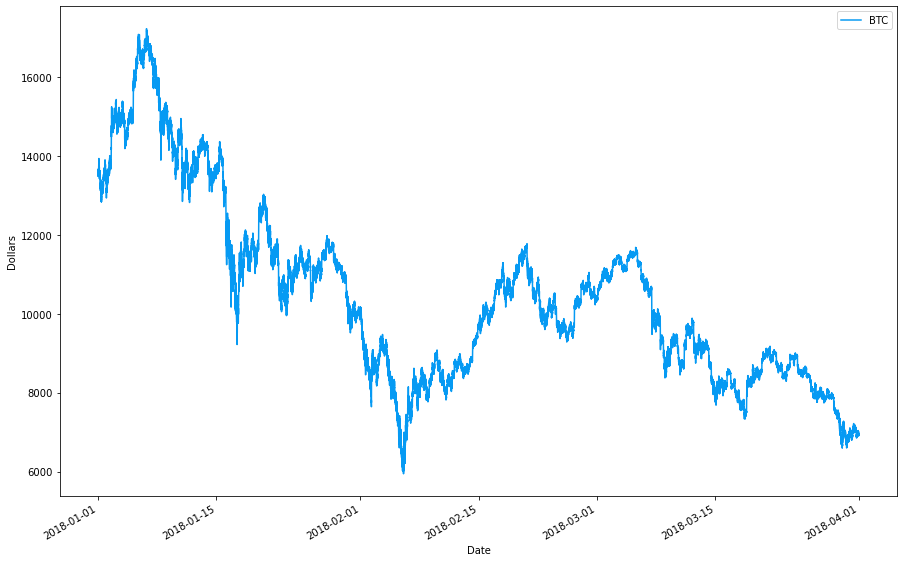

In [41]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
plot_data(bitstamp_sliced, column="Close", show_legend=True, color="#069AF3", xlabel="Date", ylabel="Dollars", legend_label="BTC")

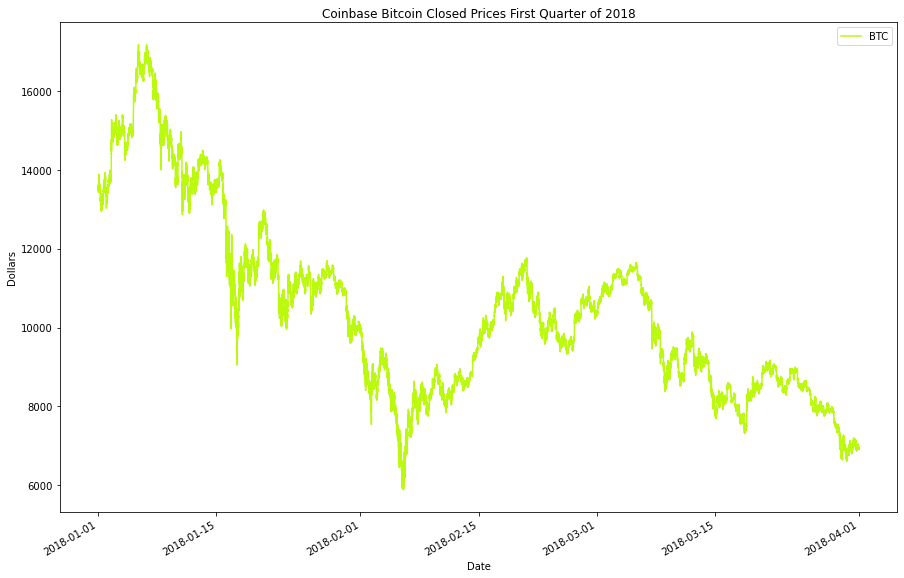

In [42]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
plot_data(coinbase_sliced, column="Close", title="Coinbase Bitcoin Closed Prices First Quarter of 2018", color="#BBF90F", xlabel="Date", ylabel="Dollars", show_legend=True, legend_label="BTC")

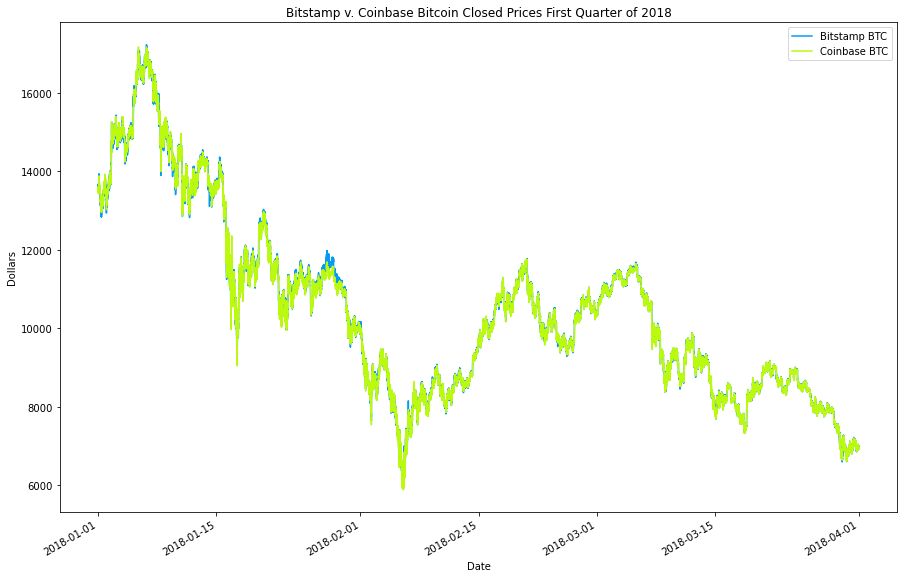

In [43]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
plot_data(bitstamp_sliced, column="Close", df2=coinbase_sliced, title="Bitstamp v. Coinbase Bitcoin Closed Prices First Quarter of 2018", 
          xlabel="Date", ylabel="Dollars", color="#069AF3", df2_color="#BBF90F", show_legend=True, legend_label="Bitstamp BTC", df2_legend_label="Coinbase BTC")

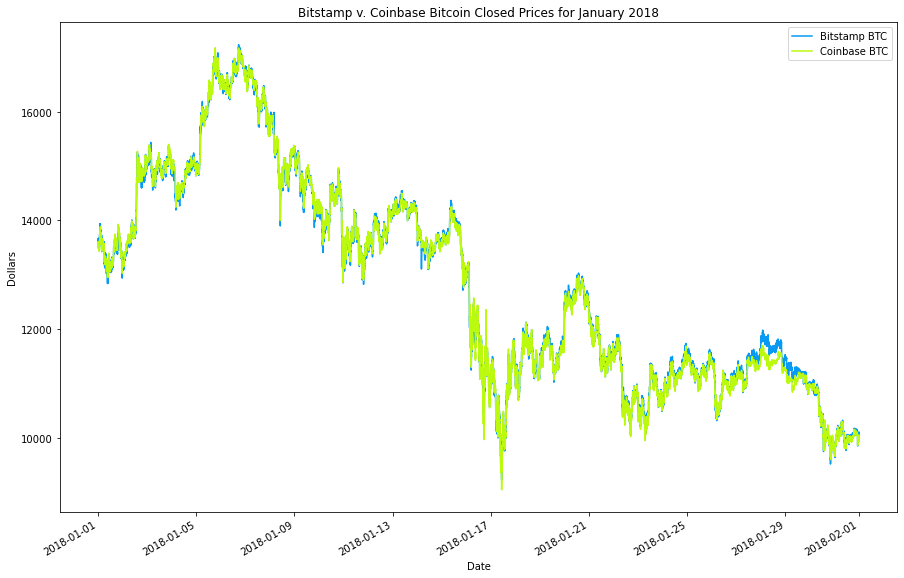

In [44]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
plot_data(bitstamp_sliced, column="Close", df2=coinbase_sliced, start_loc="2018-01-01", end_loc="2018-01-31", title="Bitstamp v. Coinbase Bitcoin Closed Prices for January 2018", 
          xlabel="Date", ylabel="Dollars", color="#069AF3", df2_color="#BBF90F", show_legend=True, legend_label="Bitstamp BTC", df2_legend_label="Coinbase BTC")

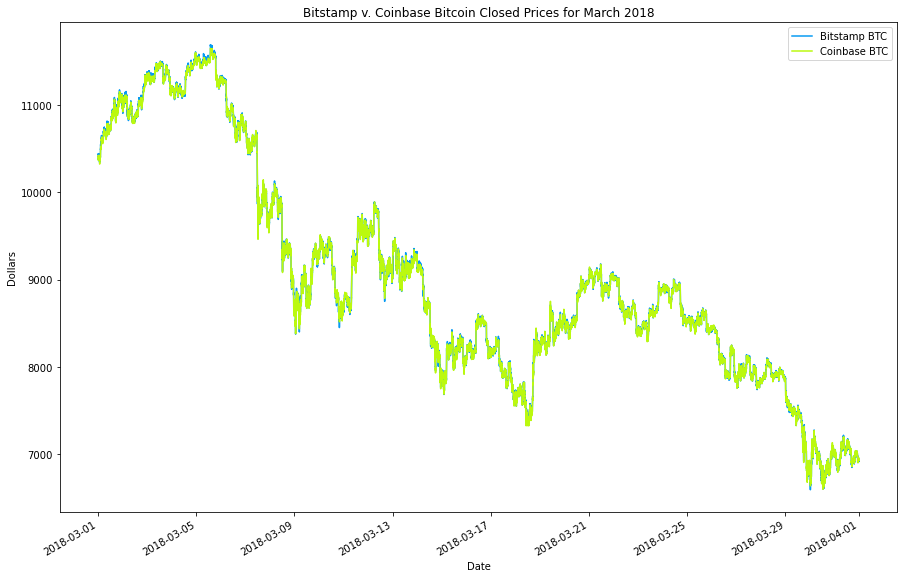

In [45]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
plot_data(bitstamp_sliced, column="Close", df2=coinbase_sliced, start_loc="2018-03-01", end_loc="2018-03-31", title="Bitstamp v. Coinbase Bitcoin Closed Prices for March 2018", 
          xlabel="Date", ylabel="Dollars", color="#069AF3", df2_color="#BBF90F", show_legend=True, legend_label="Bitstamp BTC", df2_legend_label="Coinbase BTC")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes the spread has gotten smaller as the months progressed in 2018 between the two exchanges

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

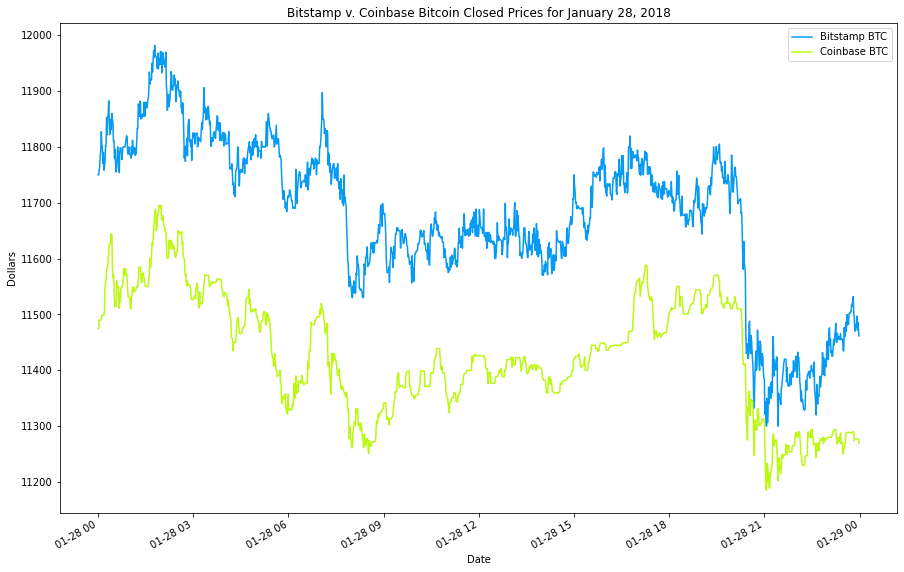

In [46]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
plot_data(bitstamp_sliced, column="Close", df2=coinbase_sliced, start_loc="2018-01-28", title="Bitstamp v. Coinbase Bitcoin Closed Prices for January 28, 2018", 
          xlabel="Date", ylabel="Dollars", color="#069AF3", df2_color="#BBF90F", show_legend=True, legend_label="Bitstamp BTC", df2_legend_label="Coinbase BTC")

In [47]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = calculate_spread(bitstamp_sliced, coinbase_sliced, "Close", start_loc="2018-01-28")

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

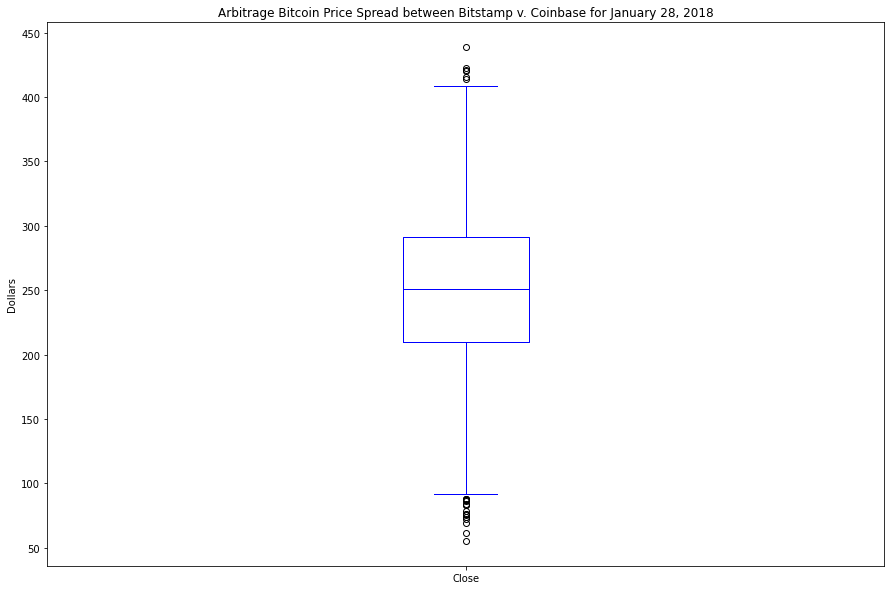

In [48]:
# Visualize the arbitrage spread from early in the dataset in a box plot
plot_data(arbitrage_spread_early, type="box", ylabel="Dollars", title="Arbitrage Bitcoin Price Spread between Bitstamp v. Coinbase for January 28, 2018")

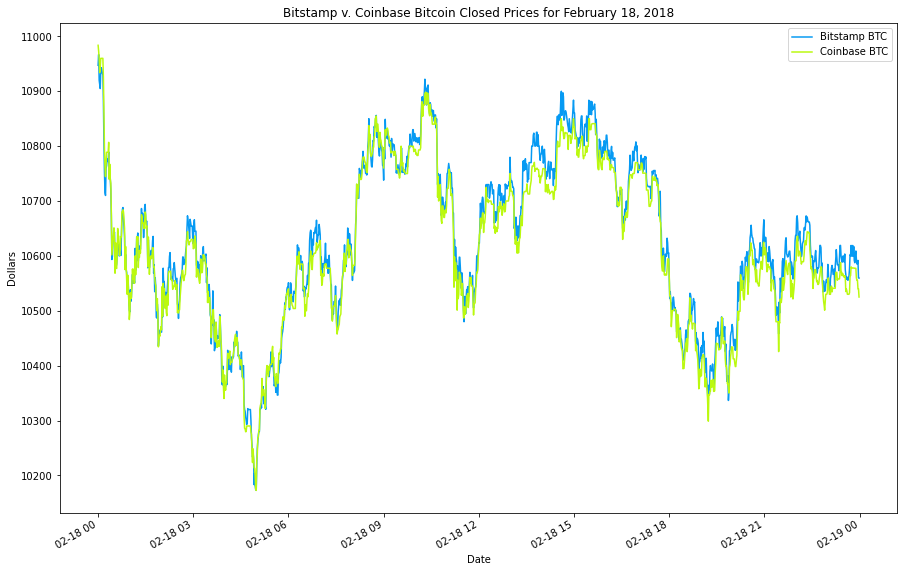

In [49]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
plot_data(bitstamp_sliced, column="Close", df2=coinbase_sliced, start_loc="2018-02-18", title="Bitstamp v. Coinbase Bitcoin Closed Prices for February 18, 2018", 
          xlabel="Date", ylabel="Dollars", color="#069AF3", df2_color="#BBF90F", show_legend=True, legend_label="Bitstamp BTC", df2_legend_label="Coinbase BTC")

In [50]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = calculate_spread(bitstamp_sliced, coinbase_sliced, "Close", start_loc="2018-02-18")

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1436.000000
mean       15.861741
std        18.735501
min       -55.590000
25%         3.182500
50%        15.820000
75%        29.277500
max        73.230000
Name: Close, dtype: float64

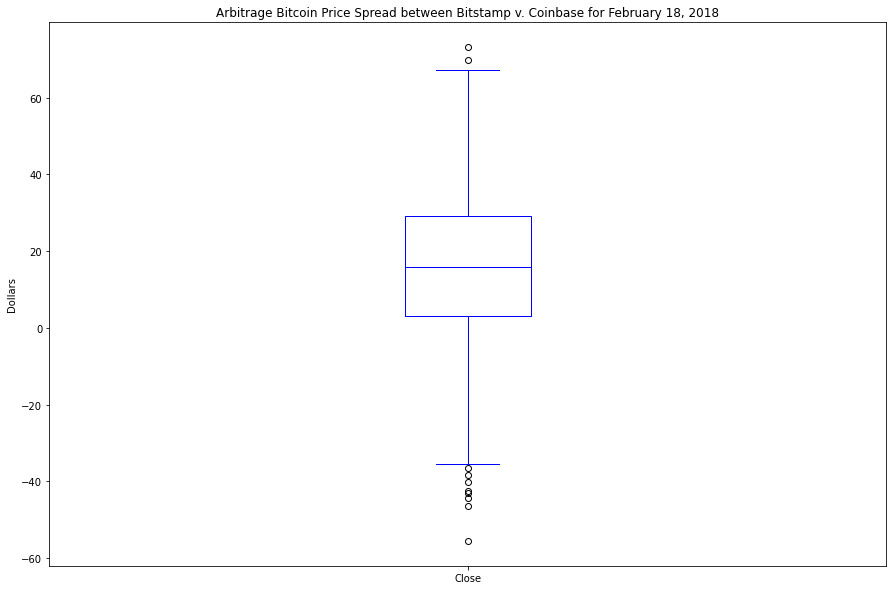

In [51]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
plot_data(arbitrage_spread_middle, type="box", ylabel="Dollars", title="Arbitrage Bitcoin Price Spread between Bitstamp v. Coinbase for February 18, 2018")

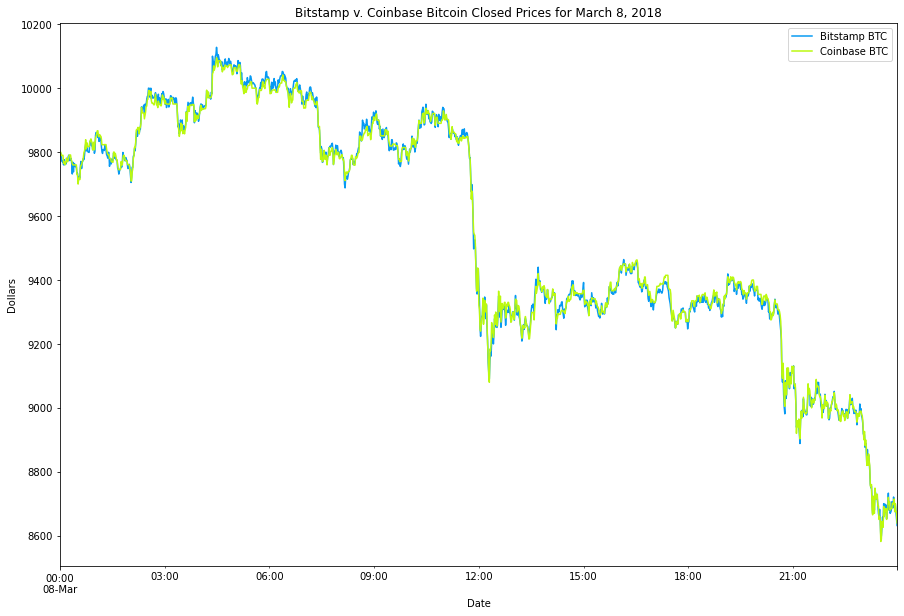

In [52]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
plot_data(bitstamp_sliced, column="Close", df2=coinbase_sliced, start_loc="2018-03-08", title="Bitstamp v. Coinbase Bitcoin Closed Prices for March 8, 2018", 
          xlabel="Date", ylabel="Dollars", color="#069AF3", df2_color="#BBF90F", show_legend=True, legend_label="Bitstamp BTC", df2_legend_label="Coinbase BTC")

In [53]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = calculate_spread(bitstamp_sliced, coinbase_sliced, "Close", start_loc="2018-03-08")

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1440.000000
mean        0.252229
std        13.859585
min       -54.670000
25%        -8.995000
50%         0.135000
75%         9.625000
max        60.000000
Name: Close, dtype: float64

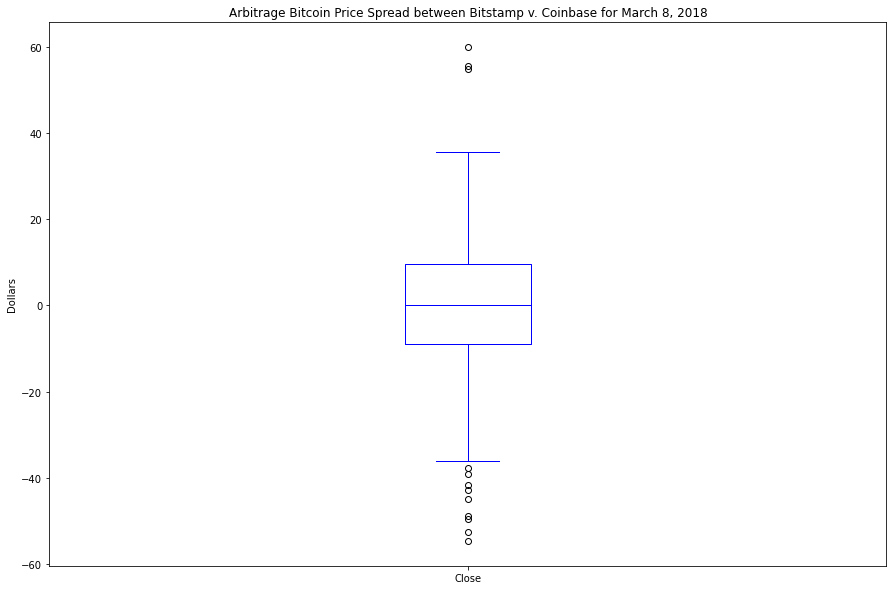

In [54]:
# Visualize the arbitrage spread from late in the dataset in a box plot
plot_data(arbitrage_spread_late, type="box", ylabel="Dollars", title="Arbitrage Bitcoin Price Spread between Bitstamp v. Coinbase for March 8, 2018")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [55]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = calculate_spread(bitstamp_sliced, coinbase_sliced, "Close", start_loc="2018-01-28")

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early_greater_than_zero = arbitrage_spread_early[arbitrage_spread_early > 0]
arbitrage_spread_early_greater_than_zero.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [56]:
# For the date middle in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = calculate_spread(bitstamp_sliced, coinbase_sliced, "Close", start_loc="2018-02-18")

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame   
arbitrage_spread_middle_greater_than_zero = arbitrage_spread_middle[arbitrage_spread_middle > 0]
arbitrage_spread_middle_greater_than_zero.describe()

count    1152.000000
mean       22.449896
std        13.987412
min         0.070000
25%        11.175000
50%        21.045000
75%        31.725000
max        73.230000
Name: Close, dtype: float64

In [57]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = calculate_spread(bitstamp_sliced, coinbase_sliced, "Close", start_loc="2018-03-08")

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late_greater_than_zero = arbitrage_spread_late[arbitrage_spread_late > 0]
arbitrage_spread_late_greater_than_zero.describe()

count    728.000000
mean      11.069121
std        8.508512
min        0.010000
25%        4.377500
50%        9.495000
75%       16.122500
max       60.000000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [58]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early_greater_than_zero / coinbase_sliced["Close"].loc["2018-01-28"]

# Review the spread return DataFrame
spread_return_early.head(10)


Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
2018-01-28 00:05:00    0.026465
2018-01-28 00:06:00    0.029151
2018-01-28 00:07:00    0.026618
2018-01-28 00:08:00    0.026180
2018-01-28 00:09:00    0.023577
Name: Close, dtype: float64

In [59]:
# Replace the NaNs with 0
spread_return_early = spread_return_early.fillna(0)

#Review the spread after replacing NaNs
spread_return_early.head(10)

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
2018-01-28 00:05:00    0.026465
2018-01-28 00:06:00    0.029151
2018-01-28 00:07:00    0.026618
2018-01-28 00:08:00    0.026180
2018-01-28 00:09:00    0.023577
Name: Close, dtype: float64

In [60]:
# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = arbitrage_spread_middle_greater_than_zero / coinbase_sliced["Close"].loc["2018-02-18"]

# Review the spread return DataFrame
spread_return_middle.head(10)

Timestamp
2018-02-18 00:00:00   NaN
2018-02-18 00:01:00   NaN
2018-02-18 00:02:00   NaN
2018-02-18 00:03:00   NaN
2018-02-18 00:04:00   NaN
2018-02-18 00:05:00   NaN
2018-02-18 00:06:00   NaN
2018-02-18 00:07:00   NaN
2018-02-18 00:08:00   NaN
2018-02-18 00:09:00   NaN
Name: Close, dtype: float64

In [61]:
# Replace the NaNs with 0
spread_return_middle = spread_return_middle.fillna(0)

#Review the spread after replacing NaNs
spread_return_middle.head(10)

Timestamp
2018-02-18 00:00:00    0.0
2018-02-18 00:01:00    0.0
2018-02-18 00:02:00    0.0
2018-02-18 00:03:00    0.0
2018-02-18 00:04:00    0.0
2018-02-18 00:05:00    0.0
2018-02-18 00:06:00    0.0
2018-02-18 00:07:00    0.0
2018-02-18 00:08:00    0.0
2018-02-18 00:09:00    0.0
Name: Close, dtype: float64

In [62]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = arbitrage_spread_late_greater_than_zero / coinbase_sliced["Close"].loc["2018-03-08"]

# Review the spread return DataFrame
spread_return_late.head(10)

Timestamp
2018-03-08 00:00:00         NaN
2018-03-08 00:01:00         NaN
2018-03-08 00:02:00         NaN
2018-03-08 00:03:00         NaN
2018-03-08 00:04:00         NaN
2018-03-08 00:05:00         NaN
2018-03-08 00:06:00         NaN
2018-03-08 00:07:00    0.000658
2018-03-08 00:08:00         NaN
2018-03-08 00:09:00    0.000553
Name: Close, dtype: float64

In [63]:
# Replace the NaNs with 0
spread_return_late = spread_return_late.fillna(0)

#Review the spread after replacing NaNs
spread_return_late.head(10)

Timestamp
2018-03-08 00:00:00    0.000000
2018-03-08 00:01:00    0.000000
2018-03-08 00:02:00    0.000000
2018-03-08 00:03:00    0.000000
2018-03-08 00:04:00    0.000000
2018-03-08 00:05:00    0.000000
2018-03-08 00:06:00    0.000000
2018-03-08 00:07:00    0.000658
2018-03-08 00:08:00    0.000000
2018-03-08 00:09:00    0.000553
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [64]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head(5)

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

In [65]:
# For the date middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head(5)

Series([], Name: Close, dtype: float64)

In [66]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head(5)

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [67]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

In [68]:
# For the date middle in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [69]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [70]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced["Close"].loc["2018-01-28"]

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head(10)

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
2018-01-28 00:05:00    304.08
2018-01-28 00:06:00    335.01
2018-01-28 00:07:00    306.08
2018-01-28 00:08:00    301.04
2018-01-28 00:09:00    271.11
Name: Close, dtype: float64

In [71]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * coinbase_sliced["Close"].loc["2018-02-18"]

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the middle profit DataFrame
profit_per_trade_middle.head(10)

Series([], Name: Close, dtype: float64)

In [72]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * coinbase_sliced["Close"].loc["2018-03-08"]

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the late profit DataFrame
profit_per_trade_late.head(10)

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [73]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    1378.000000
mean      253.931996
std        62.057953
min       113.970000
25%       217.272500
50%       254.150000
75%       292.987500
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit per Trade in Bitcoin on January 28, 2018'}, xlabel='Date', ylabel='Dollars'>

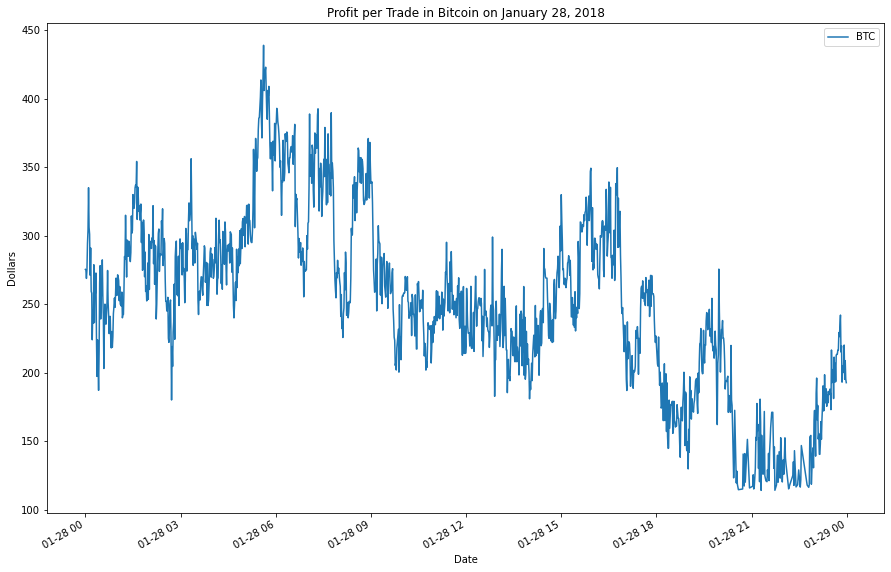

In [74]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(legend=True, figsize=(15, 10), xlabel="Date", ylabel="Dollars", title="Profit per Trade in Bitcoin on January 28, 2018", label="BTC")

In [75]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit per Trade in Bitcoin on February 18, 2018'}, xlabel='Date', ylabel='Dollars'>

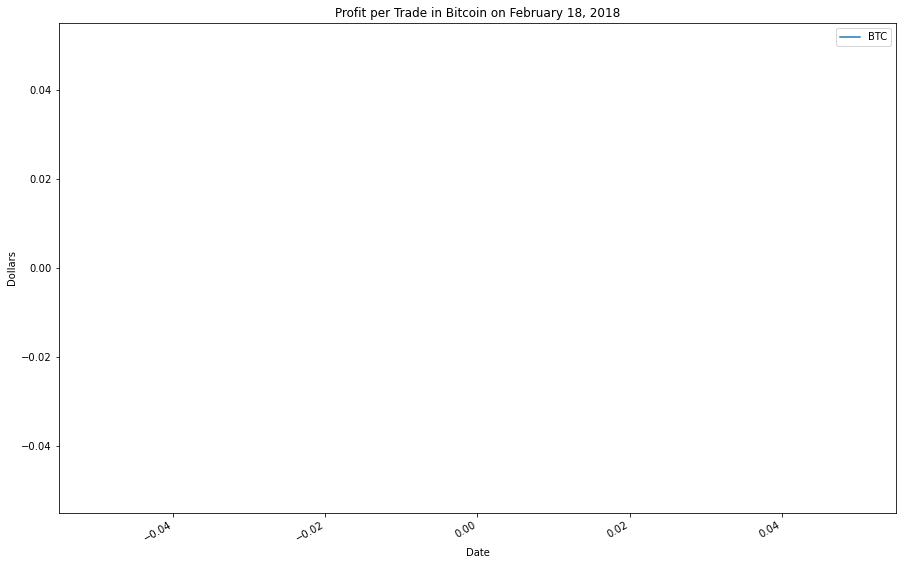

In [76]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(legend=True, figsize=(15, 10), xlabel="Date", ylabel="Dollars", title="Profit per Trade in Bitcoin on February 18, 2018", label="BTC")

In [77]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit per Trade in Bitcoin on March 8, 2018'}, xlabel='Date', ylabel='Dollars'>

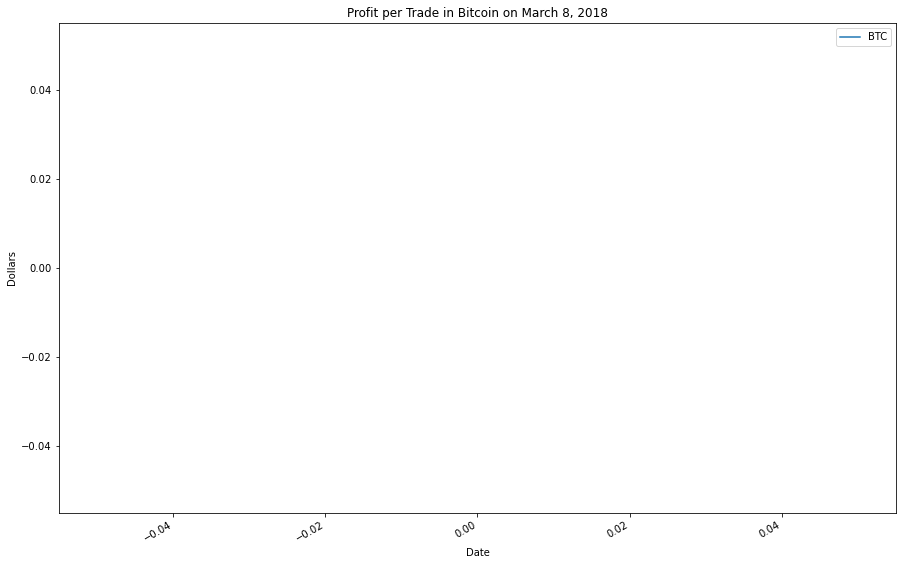

In [78]:
# Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot(legend=True, figsize=(15, 10), xlabel="Date", ylabel="Dollars", title="Profit per Trade in Bitcoin on March 8, 2018", label="BTC")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [79]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early_sum = profit_per_trade_early.sum()
profit_per_trade_early_sum

349918.2900000001

In [80]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_per_trade_middle_sum = profit_per_trade_middle.sum()
profit_per_trade_middle_sum

0.0

In [81]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_per_trade_late_sum = profit_per_trade_late.sum()
profit_per_trade_late_sum

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [82]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits on January 28, 2018'}, xlabel='Date', ylabel='Dollars'>

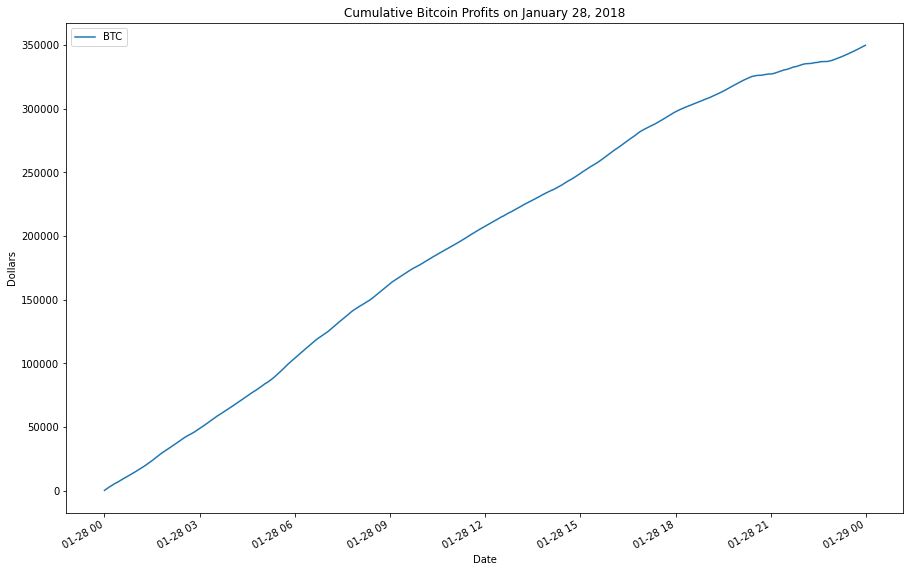

In [83]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(legend=True, figsize=(15, 10), xlabel="Date", ylabel="Dollars", title="Cumulative Bitcoin Profits on January 28, 2018", label="BTC")

In [84]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits on February 18, 2018'}, xlabel='Date', ylabel='Dollars'>

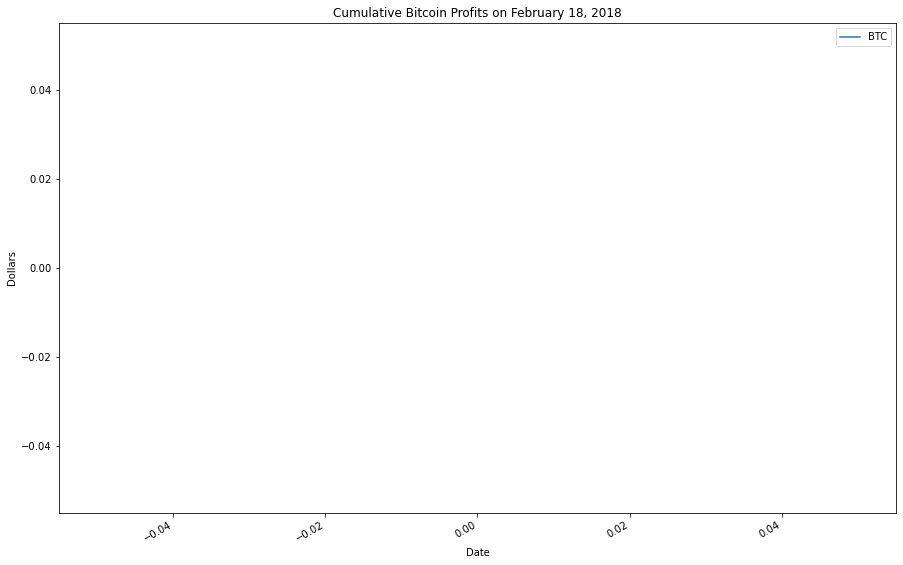

In [85]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot(legend=True, figsize=(15, 10), xlabel="Date", ylabel="Dollars", title="Cumulative Bitcoin Profits on February 18, 2018", label="BTC")

In [86]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits on March 8, 2018'}, xlabel='Date', ylabel='Dollars'>

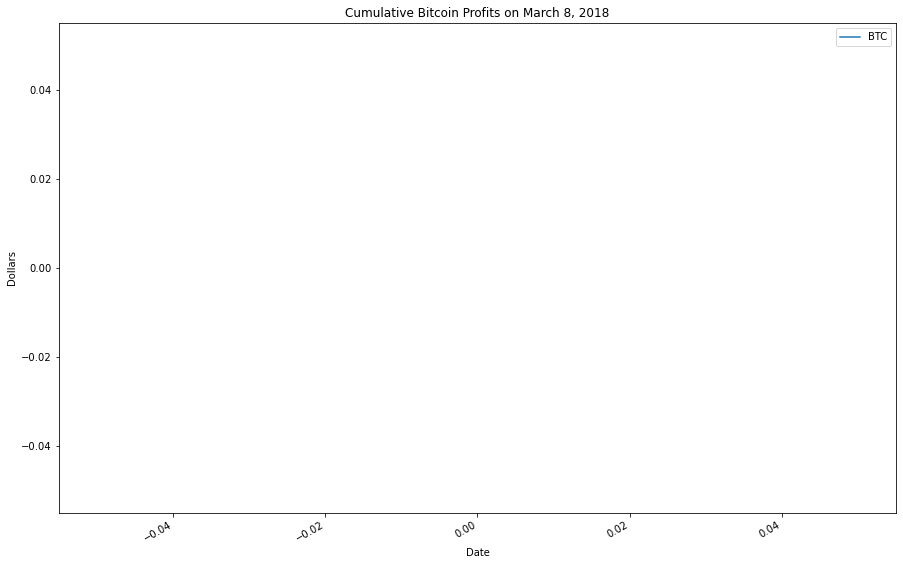

In [87]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_late.plot(legend=True, figsize=(15, 10), xlabel="Date", ylabel="Dollars", title="Cumulative Bitcoin Profits on March 8, 2018", label="BTC")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** The potential profit spreads seem to be tightening after the following months of January 2018.  This indicates that the bitcoin prices between both the bitstamp and coinbase exchanges appear to be very much in sync to each other.  Thus, any potential profit opportunities via arbitrage are becoming so few and far between.